# Start

In [2]:
import pandas as pd
import numpy as np
import pickle 

import seaborn as sb
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [1]:
# maximum text
# sb.set()
# pd.set_option('display.max_colwidth', None)

# Load dataset

## GabHateCorpus

In [47]:
dataset_name = "GabHateCorpus"
filepath = "Dataset/GabHateCorpus/"
df = pd.read_csv(filepath+"data_processed.csv")
df['class'].value_counts()

class
Non-Hate    23769
Hate         3344
Name: count, dtype: int64

## SE2019 dataset

In [40]:
dataset_name = "SE2019"
filepath = "Dataset/SE2019/"
df = pd.read_csv(filepath+"data_processed.csv")
df['class'].value_counts()

class
Non-Hate    5195
Hate        3781
Name: count, dtype: int64

## data analyze

In [4]:
df.head(5)

,class,text,hate
0,Non-Hate,likely converted islam due nature suitable isl...,0
1,Non-Hate,ford lied psychologist records seem indicate s...,0
2,Non-Hate,jobs education ending abuse nation ca,0
3,Non-Hate,share lot values like many dont call alt right...,0
4,Non-Hate,ready get back blogging #recipes #foodphotography,0


In [5]:
df[df['text'].isnull()]

,class,text,hate


# Split dataset

In [48]:
x = np.array(df["text"])
y = np.array(df["class"])

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.30, random_state=42) #random state ensure same sample
print("Train Set :", x_train.shape, y_train.shape) 
print("Test Set  :", x_test.shape, y_test.shape) 

# y in digit form
y_train_binary = np.array(list(map(lambda x:1 if x=="Hate" else 0, y_train)))
y_test_binary = np.array(list(map(lambda x:1 if x=="Hate" else 0, y_test)))

Train Set : (18979,) (18979,)
Test Set  : (8134,) (8134,)


se2019 = 'austria wonder countri refug bill see socialwelfar also help get televisionset refug famili styria ', <br>
gab = mainstream muslims murder gays ',

In [49]:
x_train[:10]

array(['mainstream muslims murder gays ',
       'lds church christian church could stomach ',
       'exactly voted really believed himeven stuck around longer one betrayal another cut losses accepted reality imo still refuse bad hillary supporters maybe worse',
       'didnt say anything trump neo one votered',
       'sitting united states senator admits primary goal help people united states citizens ',
       'nine ten underage moroccans sweden caught lying age ',
       'youre referring youcis youre one viscerally repulsed art apparently shes mischling raised single parent wondering biosocial aspects inherited degeneracy really gross stuff ',
       'seriously people drink heartattack realize actually jewish symbols ya know ',
       'thing mental prisons worst prison guard',
       'couple fine looking gents right'], dtype=object)

# Feature engineering - Word embeding

- Word2Vec and GloVe are based on static word embeddings while Transformers are based on dynamic word embeddings.

- Many different models for creating pre-trained word embeddings such as Word2Vec, GloVe, fastText, and BioWordVec 

- https://www.analyticsvidhya.com/blog/2017/06/word-embeddings-count-word2veec/
- CountVectorizer, Tfidftransformer & Tfidfvectorizer are Frequency based Word Embedding technique
- Tfidftransformer acts on sparse matrix and Tfidfvectorizer acts on raw text data
- Tfidfvectorizer = countVectorizater + Tfidftransformer

- https://www.analyticsvidhya.com/blog/2018/07/hands-on-sentiment-analysis-dataset-python/
- vectorizer = word embedding process of converting text data to numerical vector

In [11]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

## Word2Vec

- https://spotintelligence.com/2023/02/15/word2vec-for-text-classification/#:~:text=Word2Vec%20is%20a%20popular%20algorithm,a%20large%20corpus%20of%20text
- Word2vec is not a single algorithm but a combination of two techniques – CBOW(Continuous bag of words) and Skip-gram model.

In [9]:
from gensim.models import Word2Vec

In [10]:
class w2vVectorizer():
    def __init__(self) -> None:
        self.w2v_model = None
    
    def w2v_vectorizer(self,sentence):
        # vectorize the text data
        words = sentence.split()
        words_vec = [self.w2v_model.wv[word] for word in words if word in self.w2v_model.wv]
        if len(words_vec) == 0:
            return np.zeros(100)
        words_vec = np.array(words_vec)
        return words_vec.mean(axis=0)
    
    def fit(self, x, y=None):
        # train the model when fit the pipeline
        sentences = [sentence.split() for sentence in x]
        self.w2v_model = Word2Vec(sentences, vector_size=100, window=5, min_count=2, workers=4)
        return self
    
    def transform(self, x, y=None):
        # when use fit or transform on the pipeline 
        return np.array([self.w2v_vectorizer(sentence) for sentence in x])

# Machine learning

In [10]:
# save model
def save_model(model, model_name):
    filename = f"models/{model_name}.pickle"
    pickle.dump(model, open(filename,"wb"))

## Decision Tree

In [14]:
#convert given text to a vector base
from sklearn.tree import DecisionTreeClassifier

In [424]:
model = Pipeline([('vect', CountVectorizer()),
               ('clf', DecisionTreeClassifier()),
              ])
model_name = "dtc"
model.fit(x_train, y_train)
save_model(model,model_name)

In [232]:
model = Pipeline([('vect', TfidfVectorizer()),
               ('clf', DecisionTreeClassifier()),
              ])
model_name = "dtc-tfid"
model.fit(x_train, y_train)
save_model(model,model_name)

In [233]:
model = Pipeline([('vect', w2vVectorizer()),
               ('clf', DecisionTreeClassifier()),
              ])
model_name = "dtc-w2v"
model.fit(x_train, y_train)
save_model(model,model_name)

## Support Vector Machine

- supervisied learning algorithm
- Unlike neural networks, SVMs can work with very small datasets and are not prone to overfitting.

In [39]:
from sklearn.linear_model import SGDClassifier

In [234]:
model = Pipeline([('vect', CountVectorizer()),
                ('clf', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None)),
               ])
model_name = "svm"
model.fit(x_train, y_train)
save_model(model, model_name)

In [235]:
model = Pipeline([('vect', TfidfVectorizer()),
               ('clf', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None)),
              ])
model_name = "svm-tfid"
model.fit(x_train, y_train)
save_model(model, model_name)

In [236]:
model = Pipeline([('vect', w2vVectorizer()),
               ('clf', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None)),
              ])
model_name = "svm-w2v"
model.fit(x_train, y_train)
save_model(model, model_name)

## Logistic Regression 

In [46]:
from sklearn.linear_model import LogisticRegression

In [237]:
model = Pipeline([('vect', CountVectorizer()),
        ('clf', LogisticRegression(n_jobs=1, C=1e5,max_iter=6300)),
        ])
model_name = "lr"
model.fit(x_train, y_train)
save_model(model, model_name)

In [238]:
model = Pipeline([('vect', TfidfVectorizer()),
        ('clf', LogisticRegression(n_jobs=1, C=1e5,max_iter=6300)),
        ])
model_name = "lr-tfid"
model.fit(x_train, y_train)
save_model(model, model_name)

In [239]:
model = Pipeline([('vect', w2vVectorizer()),
        ('clf', LogisticRegression(n_jobs=1, C=1e5,max_iter=6300)),
        ])
model_name = "lr-w2v"
model.fit(x_train, y_train)
save_model(model, model_name)

## Predict

In [ ]:
# Predict data
print("Test Data Accuracy  :\t", model.score(x_test, y_test))
y_test_pred = model.predict(x_test)

# Deep Neural network

- https://www.youtube.com/watch?v=oWo9SNcyxlI
- good read for = https://bmcmedresmethodol.biomedcentral.com/articles/10.1186/s12874-022-01665-y

- cnn
- transformer encoder
- pretrained bert
- typical neural network = rnn, gru, lstm, bi-lstm

- other than bert, the rest need word embedding so do glove, word2vec and fasttext


In [8]:
from keras.preprocessing.text import one_hot, Tokenizer
from keras.models import Sequential
from keras.utils.data_utils import pad_sequences
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten, GlobalMaxPooling1D, Embedding
from keras.layers import Conv1D, LSTM, SpatialDropout1D, Bidirectional, GRU, SimpleRNN

from keras.metrics import BinaryAccuracy,Precision,Recall

from keras.layers import Layer
from keras.models import load_model
import keras

METRICS = [
    BinaryAccuracy(name="accuracy"),
    Precision(name="precision"),
    Recall(name="recall")
]

def save_model_nn(model, model_name, embedding_name, dataset_name):
    filename = f"models/{dataset_name}_{embedding_name}_{model_name}"
    model.save(filename)
    return filename

In [3]:
# import tensorflow as tf
# tf.test.gpu_device_name()

Word Embeding layer convert text to numeric form which is used as the first layer for the deep learning model
- https://speakai.co/the-best-pretrained-word-embeddings/#:~:text=The%20most%20popular%20pretrained%20word,GloVe%2C%20Word2Vec%2C%20and%20FastText.

## Glove embedding

In [10]:
embedding_name = "glove"
text_length = 50 #pad/truncate text to this long, such that each text after token will be this long

custom_encoder = keras.layers.TextVectorization(
    standardize = None,
    output_sequence_length=text_length, 
)
custom_encoder.adapt(x_train)
vocab = custom_encoder.get_vocabulary()
print(f"total vocab {len(vocab)}")
vocab_dict = dict(zip(vocab, range(len(vocab))))

# load glove to dictionay
embeddings_dic = dict()
glove_file = open("Dataset/glove_embedding.txt", encoding="utf8")

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = np.asarray(records[1:], dtype='float32')
    embeddings_dic[word] = vector_dimensions
glove_file.close()
print("Total words ", len(embeddings_dic))

# create vocab length is the size of token in dictionary
# Size of the vocabulary
vocab_length = len(vocab) + 1
embedding_dim = 100 #each glove word is 100 long

hits = 0
miss = 0

# create embedding matrix having 100 col
# for all vocab word we give it a vector value from glove
# for those not found in glove will be empty 0
# size of embedding_matriz = size of word_tokenizer.word_index.items()
# embedding_matrix is the weight 
embedding_matrix = np.zeros((vocab_length, embedding_dim))
for word, index in vocab_dict.items():
    embedding_vector = embeddings_dic.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector
        hits += 1
    else:
        miss +=1
print("Converted %d words (%d misses)" % (hits, miss))

custom_embedding = Embedding(vocab_length, embedding_dim, 
               embeddings_initializer=keras.initializers.Constant(embedding_matrix), 
               trainable = False,
               input_length=text_length,
               mask_zero=True)

total vocab 32002
Total words  400000
Converted 22653 words (9349 misses)


## FastText

- https://medium.com/@93Kryptonian/word-embedding-using-fasttext-62beb0209db9
- It treats each word as composed of n-grams. In word2vec each word is represented as a bag of words but in FastText each word is represented as a bag of character n-gram.


In [9]:
from gensim.models import FastText

In [10]:
embedding_name = "fasttext"
text_length = 50 #pad/truncate text to this long, such that each text after token will be this long
vector_size=100

sentences = [sentence.split() for sentence in x_train]
ft_model = FastText(sentences, vector_size=vector_size, window=5, min_count=2, workers=4, seed=42, sg=1, epochs=10) # skip gram or cbow=0
ft = ft_model.wv
ft_vocab = ft.index_to_key

custom_encoder = keras.layers.TextVectorization(
    standardize = None,
    output_sequence_length=text_length, 
    vocabulary = ft_vocab
)

vocab = custom_encoder.get_vocabulary()
print(f"total vocab {len(vocab)}")
vocab_dict = dict(zip(vocab, range(len(vocab))))

vocab_length = len(vocab) + 1
embedding_dim = vector_size

hits = 0
miss = 0

embedding_matrix = np.zeros((vocab_length, embedding_dim))
for word, index in vocab_dict.items():
    embedding_vector = ft[word]
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector
        hits += 1
    else:
        miss +=1
print("Converted %d words (%d misses)" % (hits, miss))

custom_embedding = Embedding(vocab_length, embedding_dim, 
               embeddings_initializer=keras.initializers.Constant(embedding_matrix), 
               trainable = False,
               input_length=text_length,
               mask_zero=True)

total vocab 6009
Converted 6009 words (0 misses)


## Word2Vec

In [41]:
from gensim.models import Word2Vec

In [52]:
embedding_name = "word2vec"
text_length = 50 #pad/truncate text to this long, such that each text after token will be this long
vector_size=100

sentences = [sentence.split() for sentence in x_train]
w_model = Word2Vec(sentences, vector_size=100, window=5, min_count=2, workers=4)
w = w_model.wv
w_vocab = w.index_to_key

custom_encoder = keras.layers.TextVectorization(
    standardize = None,
    output_sequence_length=text_length, 
    vocabulary = w_vocab
)

vocab = custom_encoder.get_vocabulary()
print(f"total vocab {len(vocab)}")
vocab_dict = dict(zip(vocab, range(len(vocab))))

vocab_length = len(vocab) + 1
embedding_dim = vector_size

hits = 0
miss = 0

embedding_matrix = np.zeros((vocab_length, embedding_dim))
for word, index in vocab_dict.items():
    if word in w.key_to_index:
        embedding_vector = w[word]
        if embedding_vector is not None:
            embedding_matrix[index] = embedding_vector
            hits += 1
        else:
            print(word)
            miss +=1
    else:
        print(word)
        miss +=1
print("Converted %d words (%d misses)" % (hits, miss))

custom_embedding = Embedding(vocab_length, embedding_dim, 
               embeddings_initializer=keras.initializers.Constant(embedding_matrix), 
               trainable = False,
               input_length=text_length,
               mask_zero=True)

total vocab 6009

[UNK]
Converted 6007 words (2 misses)


## Simple Neural network

In [270]:
model = Sequential()
model.add(custom_encoder)
model.add(custom_embedding)
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=METRICS)

history = model.fit(x_train, y_train_binary, epochs=10,
                    validation_data=(x_test,y_test_binary))

model_name = "snn-"+embedding_name
save_model_nn(model, model_name)

Epoch 1/10
197/197 [==============================] - 3s 10ms/step - loss: 0.6182 - accuracy: 0.6797 - precision: 0.6646 - recall: 0.4837 - val_loss: 0.5976 - val_accuracy: 0.6914 - val_precision: 0.6359 - val_recall: 0.6161
Epoch 2/10
197/197 [==============================] - 2s 8ms/step - loss: 0.5858 - accuracy: 0.6954 - precision: 0.6685 - recall: 0.5526 - val_loss: 0.5857 - val_accuracy: 0.6966 - val_precision: 0.6845 - val_recall: 0.5115
Epoch 3/10
197/197 [==============================] - 2s 8ms/step - loss: 0.5777 - accuracy: 0.6973 - precision: 0.6673 - recall: 0.5646 - val_loss: 0.5866 - val_accuracy: 0.7000 - val_precision: 0.6961 - val_recall: 0.5035
Epoch 4/10
197/197 [==============================] - 2s 8ms/step - loss: 0.5695 - accuracy: 0.7043 - precision: 0.6734 - recall: 0.5820 - val_loss: 0.5842 - val_accuracy: 0.6985 - val_precision: 0.7101 - val_recall: 0.4734
Epoch 5/10
197/197 [==============================] - 2s 8ms/step - loss: 0.5651 - accuracy: 0.7091 - p

INFO:tensorflow:Assets written to: models/snn-fasttext\assets


INFO:tensorflow:Assets written to: models/snn-fasttext\assets


## CNN 

- usually for 2d image recognition 
- use 1d cnn for text classification

In [21]:
model = Sequential()
model.add(custom_encoder)
model.add(custom_embedding)
model.add(Conv1D(128, 5, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=METRICS)

history = model.fit(x_train, y_train_binary, epochs=10,
                    validation_data=(x_test,y_test_binary))

save_model_nn(model, "cnn", embedding_name, dataset_name)

Epoch 1/10
594/594 [==============================] - 5s 7ms/step - loss: 0.3180 - accuracy: 0.8829 - precision: 0.5808 - recall: 0.2101 - val_loss: 0.2855 - val_accuracy: 0.8914 - val_precision: 0.6701 - val_recall: 0.2004
Epoch 2/10
594/594 [==============================] - 4s 7ms/step - loss: 0.2363 - accuracy: 0.9100 - precision: 0.7646 - recall: 0.3990 - val_loss: 0.2791 - val_accuracy: 0.8917 - val_precision: 0.6356 - val_recall: 0.2431
Epoch 3/10
594/594 [==============================] - 4s 7ms/step - loss: 0.1809 - accuracy: 0.9326 - precision: 0.8592 - recall: 0.5481 - val_loss: 0.2889 - val_accuracy: 0.8919 - val_precision: 0.6111 - val_recall: 0.2909
Epoch 4/10
594/594 [==============================] - 4s 7ms/step - loss: 0.1263 - accuracy: 0.9594 - precision: 0.9335 - recall: 0.7255 - val_loss: 0.3253 - val_accuracy: 0.8691 - val_precision: 0.4610 - val_recall: 0.4924
Epoch 5/10
594/594 [==============================] - 4s 7ms/step - loss: 0.0826 - accuracy: 0.9777 - pr

INFO:tensorflow:Assets written to: models/GabHateCorpus_cnn_glove\assets


INFO:tensorflow:Assets written to: models/GabHateCorpus_cnn_glove\assets


'models/GabHateCorpus_cnn_glove'

## RNN - LSTM

- LSTM is a variant of RNN
- input -> textvectorization (encoder/token) -> emedding -> nn layer
- Now that all samples have a uniform length, the model must be informed that some part of the data is actually padding and should be ignored. That mechanism is masking.


- sigmoid - 6s 32ms/step - loss: 0.1901 - accuracy: 0.9281 - precision: 0.9117 - recall: 0.9186 - val_loss: 0.7441 - val_accuracy: 0.7256 - val_precision: 0.6628 - val_recall: 0.7021
- relu - 7s 34ms/step - loss: 0.5181 - accuracy: 0.7423 - precision: 0.7250 - recall: 0.6280 - val_loss: 0.5530 - val_accuracy: 0.7338 - val_precision: 0.7074 - val_recall: 0.6215
- sigmoid is better for binary text classification

- dropout - 19s 98ms/step - loss: 0.3879 - accuracy: 0.8246 - precision: 0.7934 - recall: 0.7904 - val_loss: 0.5436 - val_accuracy: 0.7323 - val_precision: 0.6497 - val_recall: 0.7828

- GOOD = https://medium.com/mlearning-ai/the-classification-of-text-messages-using-lstm-bi-lstm-and-gru-f79b207f90ad

In [50]:
# this is better with the dropout
model = Sequential()
model.add(custom_encoder)
model.add(custom_embedding)
model.add(SpatialDropout1D(0.2))
model.add(LSTM(128))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=METRICS)

history = model.fit(x_train, y_train_binary, epochs=10,
                    validation_data=(x_test,y_test_binary))

save_model_nn(model, "lstm", embedding_name, dataset_name)

Epoch 1/10
594/594 [==============================] - 107s 171ms/step - loss: 0.3366 - accuracy: 0.8797 - precision: 0.5551 - recall: 0.1220 - val_loss: 0.3001 - val_accuracy: 0.8854 - val_precision: 0.6624 - val_recall: 0.1058
Epoch 2/10
594/594 [==============================] - 102s 172ms/step - loss: 0.2945 - accuracy: 0.8886 - precision: 0.6420 - recall: 0.2355 - val_loss: 0.2745 - val_accuracy: 0.8939 - val_precision: 0.6415 - val_recall: 0.2767
Epoch 3/10
594/594 [==============================] - 100s 168ms/step - loss: 0.2780 - accuracy: 0.8929 - precision: 0.6657 - recall: 0.2800 - val_loss: 0.2733 - val_accuracy: 0.8961 - val_precision: 0.6927 - val_recall: 0.2523
Epoch 4/10
594/594 [==============================] - 99s 167ms/step - loss: 0.2680 - accuracy: 0.8976 - precision: 0.6961 - recall: 0.3134 - val_loss: 0.2734 - val_accuracy: 0.8970 - val_precision: 0.6392 - val_recall: 0.3388
Epoch 5/10
594/594 [==============================] - 101s 169ms/step - loss: 0.2596 - ac

INFO:tensorflow:Assets written to: models/GabHateCorpus_glove_lstm\assets


INFO:tensorflow:Assets written to: models/GabHateCorpus_glove_lstm\assets


'models/GabHateCorpus_glove_lstm'

## RNN - BILSTM

In [25]:
model = Sequential()
model.add(custom_encoder)
model.add(custom_embedding)
model.add(Bidirectional(LSTM(128)))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=METRICS)

history = model.fit(x_train, y_train_binary, epochs=10,
                    validation_data=(x_test,y_test_binary))

save_model_nn(model, "bilstm", embedding_name, dataset_name)

Epoch 1/10
594/594 [==============================] - 38s 53ms/step - loss: 0.3197 - accuracy: 0.8836 - precision: 0.5658 - recall: 0.2404 - val_loss: 0.2798 - val_accuracy: 0.8898 - val_precision: 0.6000 - val_recall: 0.2655
Epoch 2/10
594/594 [==============================] - 30s 51ms/step - loss: 0.2784 - accuracy: 0.8938 - precision: 0.6667 - recall: 0.2922 - val_loss: 0.2720 - val_accuracy: 0.8962 - val_precision: 0.7152 - val_recall: 0.2350
Epoch 3/10
594/594 [==============================] - 30s 51ms/step - loss: 0.2596 - accuracy: 0.8997 - precision: 0.6932 - recall: 0.3473 - val_loss: 0.2705 - val_accuracy: 0.8950 - val_precision: 0.6088 - val_recall: 0.3672
Epoch 4/10
594/594 [==============================] - 31s 52ms/step - loss: 0.2402 - accuracy: 0.9056 - precision: 0.7202 - recall: 0.3947 - val_loss: 0.2740 - val_accuracy: 0.8965 - val_precision: 0.6466 - val_recall: 0.3164
Epoch 5/10
594/594 [==============================] - 34s 57ms/step - loss: 0.2202 - accuracy: 0

INFO:tensorflow:Assets written to: models/GabHateCorpus_bilstm_glove\assets


INFO:tensorflow:Assets written to: models/GabHateCorpus_bilstm_glove\assets


'models/GabHateCorpus_bilstm_glove'

## RNN - GRU

In [27]:
model = Sequential()
model.add(custom_encoder)
model.add(custom_embedding)
model.add(SpatialDropout1D(0.2))
model.add(GRU(128))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=METRICS)

history = model.fit(x_train, y_train_binary, epochs=10,
                    validation_data=(x_test,y_test_binary))

save_model_nn(model, "gru", embedding_name, dataset_name)

Epoch 1/10
594/594 [==============================] - 28s 41ms/step - loss: 0.3325 - accuracy: 0.8796 - precision: 0.5267 - recall: 0.2362 - val_loss: 0.2819 - val_accuracy: 0.8895 - val_precision: 0.6981 - val_recall: 0.1506
Epoch 2/10
594/594 [==============================] - 20s 34ms/step - loss: 0.2891 - accuracy: 0.8891 - precision: 0.6270 - recall: 0.2677 - val_loss: 0.2820 - val_accuracy: 0.8894 - val_precision: 0.7986 - val_recall: 0.1129
Epoch 3/10
594/594 [==============================] - 20s 34ms/step - loss: 0.2756 - accuracy: 0.8922 - precision: 0.6452 - recall: 0.2965 - val_loss: 0.2669 - val_accuracy: 0.8975 - val_precision: 0.6377 - val_recall: 0.3510
Epoch 4/10
594/594 [==============================] - 21s 35ms/step - loss: 0.2661 - accuracy: 0.8960 - precision: 0.6687 - recall: 0.3249 - val_loss: 0.2700 - val_accuracy: 0.8973 - val_precision: 0.7372 - val_recall: 0.2340
Epoch 5/10
594/594 [==============================] - 21s 35ms/step - loss: 0.2571 - accuracy: 0

INFO:tensorflow:Assets written to: models/GabHateCorpus_gru_glove\assets


INFO:tensorflow:Assets written to: models/GabHateCorpus_gru_glove\assets


'models/GabHateCorpus_gru_glove'

## RNN 

- https://www.tensorflow.org/text/tutorials/text_classification_rnn
- 'input_dim' = the vocab size that we will choose. In other words it is the number of unique words in the vocab.
- 'output_dim' = the number of dimensions we wish to embed into. Each word will be represented by a vector of this much dimensions.

In [31]:
# model = keras.Sequential([
#     custom_encoder,
#     custom_embedding,
#     keras.layers.Bidirectional(keras.layers.LSTM(64,  return_sequences=True)),
#     keras.layers.Bidirectional(keras.layers.LSTM(32)),
#     keras.layers.Dense(64, activation='relu'),
#     keras.layers.Dropout(0.5), #helps prevent overfitting
#     keras.layers.Dense(1)
# ])
# model.compile(optimizer='adam',
#               loss='binary_crossentropy',
#               metrics=METRICS)
# history = model.fit(x_train, y_train_binary, epochs=10,
#                     validation_data=(x_test,y_test_binary),)
# save_model_nn(model, "rnn-glove")

model = Sequential()
model.add(custom_encoder)
model.add(custom_embedding)
model.add(SimpleRNN(128))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=METRICS)

history = model.fit(x_train, y_train_binary, epochs=10,
                    validation_data=(x_test,y_test_binary))

save_model_nn(model, "rnn", embedding_name, dataset_name)

Epoch 1/10
594/594 [==============================] - 12s 17ms/step - loss: 0.3524 - accuracy: 0.8747 - precision: 0.4810 - recall: 0.2048 - val_loss: 0.3140 - val_accuracy: 0.8817 - val_precision: 0.6981 - val_recall: 0.0376
Epoch 2/10
594/594 [==============================] - 10s 17ms/step - loss: 0.3357 - accuracy: 0.8779 - precision: 0.5415 - recall: 0.1216 - val_loss: 0.3283 - val_accuracy: 0.8756 - val_precision: 0.4540 - val_recall: 0.1455
Epoch 3/10
594/594 [==============================] - 10s 17ms/step - loss: 0.3271 - accuracy: 0.8791 - precision: 0.5740 - recall: 0.1101 - val_loss: 0.3433 - val_accuracy: 0.8793 - val_precision: 0.5049 - val_recall: 0.0529
Epoch 4/10
594/594 [==============================] - 10s 17ms/step - loss: 0.3296 - accuracy: 0.8810 - precision: 0.5864 - recall: 0.1465 - val_loss: 0.3138 - val_accuracy: 0.8715 - val_precision: 0.4535 - val_recall: 0.3072
Epoch 5/10
594/594 [==============================] - 10s 17ms/step - loss: 0.3162 - accuracy: 0

INFO:tensorflow:Assets written to: models/GabHateCorpus_glove_rnn\assets


INFO:tensorflow:Assets written to: models/GabHateCorpus_glove_rnn\assets


'models/GabHateCorpus_glove_rnn'

## Pre trained transformer
- gpt word embedding and bert
- based on transformer architecture
- uses deep learning for word embedding 
- Yes, transformer-based word embeddings are a form of deep learning. The transformer model architecture, which is the foundation of transformer-based word embeddings, is a deep learning architecture widely used in natural language processing (NLP) tasks.
- transformer-based word embeddings are a type of deep learning technique that utilizes the power of deep neural networks to learn contextually rich representations of words or tokens in natural language text.

## GPT

- GPT-2 belongs to a family of deep learning models called “Transformers”. Transformers are the building block of the current state-of-the-art NLP architecture
- A typical transformers design contains two parts, encoder and decoders, both working as vectorized representation of word relationships.
- https://github.com/openai/openai-cookbook/blob/main/examples/Fine-tuned_classification.ipynb
- can do through fine tunning or word embedding 
- 

In [2]:
import openai
import os

### Fine tuining 

- https://platform.openai.com/docs/api-reference/fine-tunes

In [112]:
# dataset for gpt
df_gpt = pd.DataFrame(zip(x_train,y_train_binary), columns = ['prompt', 'completion'])
df_gpt.to_json("Dataset/SE2019/gpt_data_train.jsonl", orient='records', lines=True)

df_gpt = pd.DataFrame(zip(x_test,y_test_binary), columns = ['prompt', 'completion'])
df_gpt.to_json("Dataset/SE2019/gpt_data_test.jsonl", orient='records', lines=True)

df_gpt["completion"].value_counts()

In [118]:
# prepare dataset for fine tune do in cmd
# !openai tools fine_tunes.prepare_data -f Dataset/SE2019/gpt_data_test.jsonl 

^C


In [14]:
# upload file to openai and create fine tune model
# openai.File.create(
#   file=open("Dataset/SE2019/gpt_data_train_prepared_train.jsonl", "rb"),
#   purpose='fine-tune'
# )

# openai.File.create(
#   file=open("Dataset/SE2019/gpt_data_train_prepared_valid.jsonl", "rb"),
#   purpose='fine-tune'
# )

# openai.FineTune.create(training_file ="file-XCtTOLLxI6jM59TlrDoT4LGL",
#                        validation_file="file-Do46v5kndAoPqdaR2ZVwbPT5",
#                        model = "ada",
#                        compute_classification_metrics = True,
#                        classification_positive_class = " Hate"
#                        )

<File file id=file-XCtTOLLxI6jM59TlrDoT4LGL at 0x1d8e3f835f0> JSON: {
  "object": "file",
  "id": "file-XCtTOLLxI6jM59TlrDoT4LGL",
  "purpose": "fine-tune",
  "filename": "file",
  "bytes": 656131,
  "created_at": 1687786717,
  "status": "uploaded",
  "status_details": null
}

In [7]:
openai.FineTune.list()

<OpenAIObject list at 0x27457b19310> JSON: {
  "object": "list",
  "data": [
    {
      "object": "fine-tune",
      "id": "ft-VwKO2vWcNtBJrPoZorUtFTVV",
      "hyperparams": {
        "n_epochs": 4,
        "batch_size": 8,
        "prompt_loss_weight": 0.01,
        "learning_rate_multiplier": 0.1,
        "classification_positive_class": " Hate",
        "compute_classification_metrics": true
      },
      "organization_id": "org-57m2RCBaIU5pd9nsTDikjeLg",
      "model": "ada",
      "training_files": [
        {
          "object": "file",
          "id": "file-XCtTOLLxI6jM59TlrDoT4LGL",
          "purpose": "fine-tune",
          "filename": "file",
          "bytes": 656131,
          "created_at": 1687786717,
          "status": "processed",
          "status_details": null
        }
      ],
      "validation_files": [
        {
          "object": "file",
          "id": "file-Do46v5kndAoPqdaR2ZVwbPT5",
          "purpose": "fine-tune",
          "filename": "file",
        

In [6]:
openai.FineTune.cancel(id="ft-XGDLqYtbnvM9gy4Mrm8AWGay")

<FineTune fine-tune id=ft-XGDLqYtbnvM9gy4Mrm8AWGay at 0x27457b18a10> JSON: {
  "object": "fine-tune",
  "id": "ft-XGDLqYtbnvM9gy4Mrm8AWGay",
  "hyperparams": {
    "n_epochs": 4,
    "batch_size": null,
    "prompt_loss_weight": 0.01,
    "learning_rate_multiplier": null,
    "classification_positive_class": " Hate",
    "compute_classification_metrics": true
  },
  "organization_id": "org-57m2RCBaIU5pd9nsTDikjeLg",
  "model": "ada",
  "training_files": [
    {
      "object": "file",
      "id": "file-XCtTOLLxI6jM59TlrDoT4LGL",
      "purpose": "fine-tune",
      "filename": "file",
      "bytes": 656131,
      "created_at": 1687786717,
      "status": "processed",
      "status_details": null
    }
  ],
  "validation_files": [
    {
      "object": "file",
      "id": "file-Do46v5kndAoPqdaR2ZVwbPT5",
      "purpose": "fine-tune",
      "filename": "file",
      "bytes": 122361,
      "created_at": 1687786754,
      "status": "processed",
      "status_details": null
    }
  ],
  "res

In [119]:
# create fine tune model
# !openai api fine_tunes.create -m ada -t "Dataset/SE2019/gpt_data_train_prepared.jsonl" -v "Dataset/SE2019/gpt_data_test_prepared.jsonl" --compute_classification_metrics --classification_positive_class " 0"

^C


In [9]:
openai.FineTune.retrieve(id="ft-XGDLqYtbnvM9gy4Mrm8AWGay")

<FineTune fine-tune id=ft-XGDLqYtbnvM9gy4Mrm8AWGay at 0x27457b18ef0> JSON: {
  "object": "fine-tune",
  "id": "ft-XGDLqYtbnvM9gy4Mrm8AWGay",
  "hyperparams": {
    "n_epochs": 4,
    "batch_size": null,
    "prompt_loss_weight": 0.01,
    "learning_rate_multiplier": null,
    "classification_positive_class": " Hate",
    "compute_classification_metrics": true
  },
  "organization_id": "org-57m2RCBaIU5pd9nsTDikjeLg",
  "model": "ada",
  "training_files": [
    {
      "object": "file",
      "id": "file-XCtTOLLxI6jM59TlrDoT4LGL",
      "purpose": "fine-tune",
      "filename": "file",
      "bytes": 656131,
      "created_at": 1687786717,
      "status": "processed",
      "status_details": null
    }
  ],
  "validation_files": [
    {
      "object": "file",
      "id": "file-Do46v5kndAoPqdaR2ZVwbPT5",
      "purpose": "fine-tune",
      "filename": "file",
      "bytes": 122361,
      "created_at": 1687786754,
      "status": "processed",
      "status_details": null
    }
  ],
  "res

In [189]:
# get result of model
#!openai api fine_tunes.results -i ft-LAcA6GtvgJ0lksqRT8jwtzSx > result.csv

results = pd.read_csv('result.csv')
results[results['classification/accuracy'].notnull()].tail(1)

,step,elapsed_tokens,elapsed_examples,training_loss,training_sequence_accuracy,training_token_accuracy,validation_loss,validation_sequence_accuracy,validation_token_accuracy,classification/accuracy,classification/precision,classification/recall,classification/auroc,classification/auprc,classification/f1.0
3137,3138,1017808,25104,0.030316,1.0,1.0,NaN,NaN,NaN,0.814333,0.837239,0.844728,0.890362,0.914601,0.840967


#### Predict

In [127]:
def gpt_complete_create(prompt_text):
    model_id = "ada:ft-personal-2023-06-26-17-27-28" 
    result_gpt = openai.Completion.create(model=model_id, prompt=prompt_text, max_tokens=1, temperature=0)
    return result_gpt

In [27]:
filepath = "Dataset/SE2019/gpt_data_test_prepared.jsonl"
df_gpt = pd.read_json(filepath, lines= True)
df_gpt['predicted'] = -1
df_gpt.head()

,prompt,completion
0,hey people already long islandanother chopped...,1
1,mandy manning one world reliefs friends partne...,0
2,tell us u rape people pussy ->,0
3,three streets berlin shut fighting migrants tu...,1
4,maybe visits school lebron built build one imm...,0


In [144]:
def gpt_predict(start = 0, step = 10):
    max_s = len(df_gpt)
    prompts_tosend = []
    for i in range(start, start+step):
        if i == max_s: break
        p = df_gpt.loc[i]['prompt']
        prompts_tosend.append(p)
        #print(p)
    
    predict_result = gpt_complete_create(prompts_tosend)
    choices_gpt = predict_result.to_dict()['choices']

    for i in range(len(choices_gpt)):
        j = choices_gpt[i].to_dict()
        #print(f'receiving index: {j["index"]} output: {j["text"]}')
        df_gpt.loc[start+j["index"], 'predicted'] = int(j['text'])

    print(f"next start {start+len(prompts_tosend)}")

    # for i in range(start, start+step):
    #     r = df_gpt.loc[i]
    #     print(r['prompt'], "\n", r['completion'], r['predicted'])

    return prompts_tosend, predict_result


In [142]:
len(df_gpt)

2693

In [145]:
def loop_gpt(start, end, step):
    for i in range(start, end, step):
        bb, cc = gpt_predict(i, step)
loop_gpt(0, len(df_gpt), 50)

next start 2060
next start 2110
next start 2160
next start 2210
next start 2260
next start 2310
next start 2360
next start 2410
next start 2460
next start 2510
next start 2560
next start 2610
next start 2660
next start 2693


In [147]:
df_gpt.loc[df_gpt['predicted'] == -1]

,prompt,completion,predicted


In [152]:
y_test = df_gpt['completion'].to_numpy()
y_test_pred = df_gpt['predicted'].to_numpy()

y_test = np.where(y_test == 1, "Hate", "Non-Hate") 
y_test_pred = np.where(y_test_pred == 1, "Hate", "Non-Hate") 

In [157]:
df_gpt.to_csv("Dataset/SE2019/gpt_data_test_result", index=False)

In [158]:
print(classification_report(y_test, y_test_pred, labels=["Hate","Non-Hate"]))

              precision    recall  f1-score   support

        Hate       0.78      0.78      0.78      1128
    Non-Hate       0.84      0.84      0.84      1565

    accuracy                           0.81      2693
   macro avg       0.81      0.81      0.81      2693
weighted avg       0.81      0.81      0.81      2693



## BERT

- https://towardsdatascience.com/bert-explained-state-of-the-art-language-model-for-nlp-f8b21a9b6270
- https://www.youtube.com/watch?v=hOCDJyZ6quA
- tensorflow hub bert https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4
- bert will convert sentence into embeding vector which will feed to neural network for training 
- consist of preprocess and embeding 
- (4)BERT-RNN: The corresponding representational word vectors were trained by BERT model for the input text, which were then classified by RNN neural network. (5)word2vec-RNN: This model is a traditional text classification model. 4.3.
- BERT is a neural-network-based technique for language processing pre-training
- it is not a classification algorithm 
- BERT generates <b>contextual embeddings</b>, the input to the model is a sentence rather than a single word.
- BERT learns contextualized word representations, often referred to as contextual word embeddings or contextualized embeddings. Unlike traditional word embeddings, which assign a fixed vector representation to each word, BERT's word representations are sensitive to the context in which the word appears.

## Summary

In [51]:
print(model.summary())

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization_1 (TextV  (None, 50)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 50, 100)           3200300   
                                                                 
 spatial_dropout1d_2 (Spatia  (None, 50, 100)          0         
 lDropout1D)                                                     
                                                                 
 lstm_2 (LSTM)               (None, 128)               117248    
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 1)                

## Predict

In [52]:
score = model.evaluate(x_test, y_test_binary, verbose=0)
print("Score: ", score[0])
print("Accuracy: ", score[1])

Score:  0.2901473641395569
Accuracy:  0.889845073223114


In [53]:
y_test_pred_percent = model.predict(x_test, verbose=0)
y_test_pred = np.where(y_test_pred_percent > 0.5, "Hate", "Non-Hate") 
y_test_pred = y_test_pred.flatten()

In [205]:
y_test_pred_percent

array([[0.94477934],
       [0.00477994],
       [0.4942627 ],
       ...,
       [0.53127515],
       [0.82544625],
       [0.4426138 ]], dtype=float32)

## Visualise

(0.0, 0.3435731276869774)

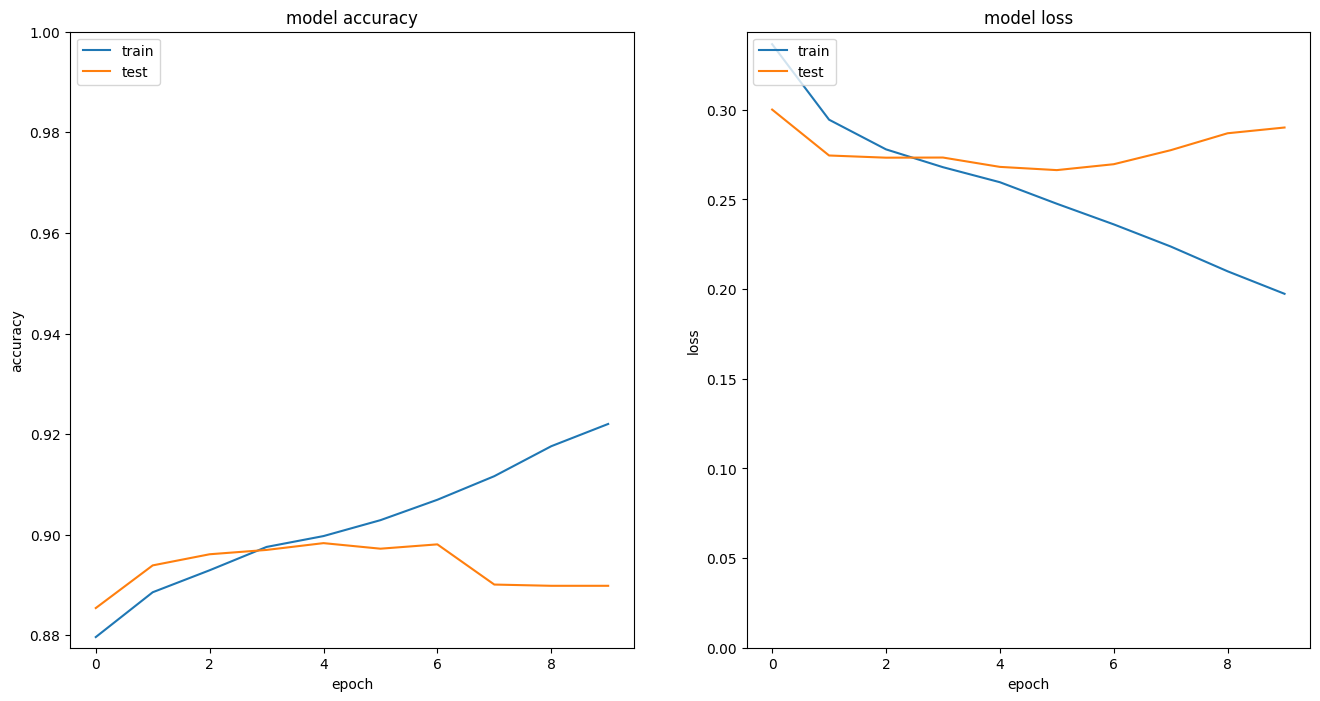

In [54]:
model_history = history
# Model performance charts
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)

plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.ylim(None, 1)
plt.subplot(1, 2, 2)

plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.ylim(0, None)


# Results

In [64]:
# Classification report
print(classification_report(y_test, y_test_pred, labels=["Hate","Non-Hate"]))

              precision    recall  f1-score   support

        Hate       0.56      0.43      0.49       983
    Non-Hate       0.92      0.95      0.94      7151

    accuracy                           0.89      8134
   macro avg       0.74      0.69      0.71      8134
weighted avg       0.88      0.89      0.88      8134



Count: Actual
Non-Hate    7151
Hate         983
Name: count, dtype: int64

Count: Predict
Non-Hate    7369
Hate         765
Name: count, dtype: int64



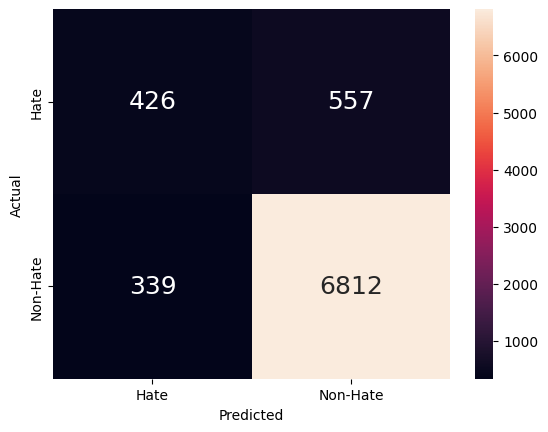

In [56]:
# Heatmap
ax = plt.subplot()

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred, labels=["Hate","Non-Hate"]), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax=ax)

ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.xaxis.set_ticklabels(["Hate","Non-Hate"])
ax.yaxis.set_ticklabels(["Hate","Non-Hate"])

# Count
df1 = pd.DataFrame({'Actual':y_test, 'Predict':y_test_pred})
# print(df1.describe())
print(f"Count: {df1['Actual'].value_counts()}")
print()
print(f"Count: {df1['Predict'].value_counts()}")
print()

# Model compare

In [84]:
# for i in model_to_load:
#     filename = f"models/{i}.pickle"
#     old_model = pickle.load(open(filename,"rb"))

def get_result_nn(model_to_load):
    c = ['Model', 'Accuracy', 'precision', 'recall', 'f1-score', 'hate f1', 'hate support', "non-hate f1", 'non-hate support']
    result_table = pd.DataFrame(columns=c)
    for i in model_to_load:
        filename = f"models/{i}"
        old_model = load_model(filename)

        y_test_pred = old_model.predict(x_test, verbose=0)
        y_test_pred = np.where(y_test_pred > 0.5, "Hate", "Non-Hate") 
        y_test_pred = y_test_pred.flatten()

        cr = classification_report(y_test, y_test_pred, labels=["Hate","Non-Hate"], output_dict=True)
        result_table.loc[len(result_table)] = [i, cr['accuracy'], cr['macro avg']['precision'], 
                                            cr['macro avg']['recall'], cr['macro avg']['f1-score'],
                                            cr['Hate']['f1-score'],cr['Hate']['support'],
                                            cr['Non-Hate']['f1-score'],cr['Non-Hate']['support']]

    return result_table.style.highlight_max(color = 'red', axis = 0)

In [87]:
ds ="GabHateCorpus"
em = 'glove'
get_result_nn([ds+"_"+em+"_lstm"])

,Model,Accuracy,precision,recall,f1-score,hate f1,hate support,non-hate f1,non-hate support
0,GabHateCorpus_glove_lstm,0.889845,0.740638,0.692981,0.712853,0.487414,983,0.938292,7151


In [46]:
ds = 'GabHateCorpus'
em = 'glove'
get_result_nn([ds+"_"+em+"_cnn", ds+"_"+em+"_rnn", ds+"_"+em+"_lstm",ds+"_"+em+"_bilstm",ds+"_"+em+"_gru"])

,Model,Accuracy,Precision,Recall,F1-Score
0,GabHateCorpus_glove_cnn,0.629781,0.636163,0.629781,0.581262
1,GabHateCorpus_glove_rnn,0.597104,0.593234,0.597104,0.512679
2,GabHateCorpus_glove_lstm,0.658374,0.658190,0.658374,0.635882
3,GabHateCorpus_glove_bilstm,0.648719,0.643891,0.648719,0.630768
4,GabHateCorpus_glove_gru,0.661344,0.657851,0.661344,0.645768


In [38]:
ds = 'GabHateCorpus'
em = 'glove'
get_result_nn([ds+"_"+em+"_cnn", ds+"_"+em+"_rnn", ds+"_"+em+"_lstm",ds+"_"+em+"_bilstm",ds+"_"+em+"_gru"])

,Model,Accuracy,Precision,Recall,F1-Score
0,GabHateCorpus_glove_cnn,0.887755,0.864472,0.887755,0.864063
1,GabHateCorpus_glove_rnn,0.885050,0.858332,0.885050,0.852100
2,GabHateCorpus_glove_lstm,0.892304,0.880023,0.892304,0.884057
3,GabHateCorpus_glove_bilstm,0.880747,0.872886,0.880747,0.876315
4,GabHateCorpus_glove_gru,0.882837,0.876953,0.882837,0.879606


In [43]:
ds = 'SE2019'
em = 'word2vec'
get_result_nn([ds+"_"+em+"_cnn", ds+"_"+em+"_rnn", ds+"_"+em+"_lstm",ds+"_"+em+"_bilstm",ds+"_"+em+"_gru"])

,Model,Accuracy,Precision,Recall,F1-Score
0,SE2019_word2vec_cnn,0.615299,0.606759,0.615299,0.579026
1,SE2019_word2vec_rnn,0.627924,0.623653,0.627924,0.624775
2,SE2019_word2vec_lstm,0.636094,0.628578,0.636094,0.621374
3,SE2019_word2vec_bilstm,0.630895,0.622984,0.630895,0.612033
4,SE2019_word2vec_gru,0.637579,0.630922,0.637579,0.618617


In [44]:
ds = 'SE2019'
em = 'fasttext'
get_result_nn([ds+"_"+em+"_cnn", ds+"_"+em+"_rnn", ds+"_"+em+"_lstm",ds+"_"+em+"_bilstm",ds+"_"+em+"_gru"])

,Model,Accuracy,Precision,Recall,F1-Score
0,SE2019_fasttext_cnn,0.733012,0.731872,0.733012,0.727599
1,SE2019_fasttext_rnn,0.715930,0.714926,0.715930,0.708364
2,SE2019_fasttext_lstm,0.743409,0.742285,0.743409,0.742655
3,SE2019_fasttext_bilstm,0.743780,0.743306,0.743780,0.743517
4,SE2019_fasttext_gru,0.740067,0.739841,0.740067,0.734209


In [45]:
ds = 'SE2019'
em = 'glove'
get_result_nn([ds+"_"+em+"_cnn", ds+"_"+em+"_rnn", ds+"_"+em+"_lstm",ds+"_"+em+"_bilstm",ds+"_"+em+"_gru"])

,Model,Accuracy,Precision,Recall,F1-Score
0,SE2019_glove_cnn,0.709989,0.707252,0.709989,0.707052
1,SE2019_glove_rnn,0.661344,0.661685,0.661344,0.661509
2,SE2019_glove_lstm,0.732269,0.746559,0.732269,0.734036
3,SE2019_glove_bilstm,0.726328,0.730623,0.726328,0.727574
4,SE2019_glove_gru,0.756034,0.754855,0.756034,0.755169


In [149]:
get_result()

,Model,Accuracy,Precision,Recall,F1-Score
0,dtc,0.749350,0.747932,0.749350,0.748249
1,dtc-tfid,0.743780,0.743531,0.743780,0.743649
2,dtc-w2v,0.586706,0.589898,0.586706,0.588024
3,svm,0.768659,0.767394,0.768659,0.766195
4,svm-tfid,0.746008,0.760112,0.746008,0.731861
5,svm-w2v,0.590048,0.611645,0.590048,0.461541
6,lr,0.684738,0.690064,0.684738,0.686326
7,lr-tfid,0.694393,0.697312,0.694393,0.695449
8,lr-w2v,0.708504,0.705758,0.708504,0.705809
